<a href="https://colab.research.google.com/github/samansadeghii/-Breast-Cancer-Wisconsin-PCA-/blob/main/(Breast_Cancer_Wisconsin(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
from google.colab import files
import pandas as pd
import io


uploaded = files.upload()


print(uploaded.keys())


file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


df.head()

Saving data.csv to data.csv
dict_keys(['data.csv'])


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# نمایش اطلاعات کلی دیتاست
print("اطلاعات کلی دیتاست:")
print(df.info())

# نمایش آمار توصیفی
print("\nآمار توصیفی داده‌ها:")
print(df.describe())

# بررسی مقادیر null
print("\nتعداد مقادیر null در هر ستون:")
print(df.isnull().sum().sort_values(ascending=False))

اطلاعات کلی دیتاست:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

In [10]:
# حذف ستون‌های غیرضروری
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# تبدیل تشخیص به مقادیر عددی (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# جداسازی ویژگی‌ها و برچسب
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# نمایش شکل داده‌ها
print("\nابعاد ماتریس ویژگی‌ها:", X.shape)
print("ابعاد بردار برچسب‌ها:", y.shape)


ابعاد ماتریس ویژگی‌ها: (569, 30)
ابعاد بردار برچسب‌ها: (569,)


In [11]:
from sklearn.preprocessing import StandardScaler

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تبدیل به دیتافریم برای مشاهده بهتر
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nنمونه‌ای از داده‌های نرمال‌شده:")
X_scaled_df.head()


نمونه‌ای از داده‌های نرمال‌شده:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


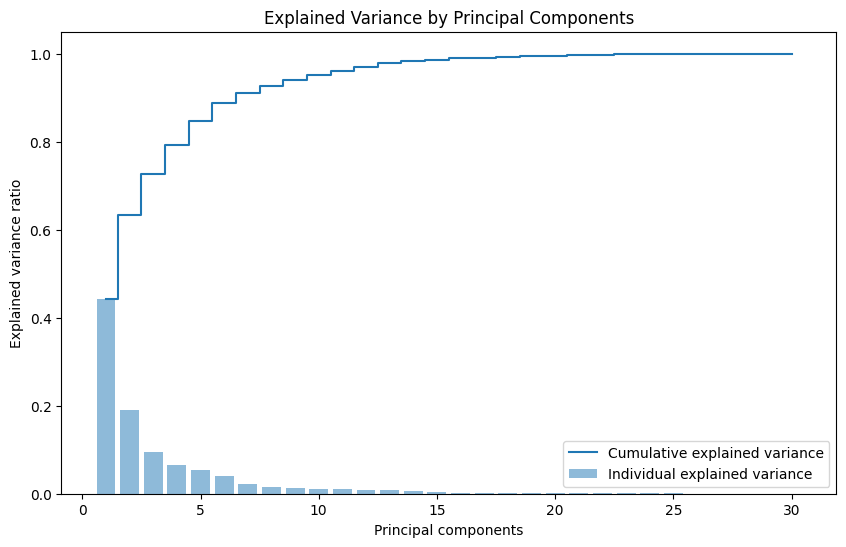

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# اعمال PCA اولیه برای بررسی
pca = PCA()
pca.fit(X_scaled)

# محاسبه واریانس تجمعی
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# رسم نمودار واریانس
plt.figure(figsize=(10,6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

In [13]:
# پیدا کردن تعداد مؤلفه‌ها برای حفظ ۹۵٪ واریانس
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nتعداد مؤلفه‌های لازم برای حفظ ۹۵٪ واریانس: {n_components}")

# اعمال PCA با تعداد مؤلفه‌های انتخاب شده
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"ابعاد داده قبل از PCA: {X_scaled.shape}")
print(f"ابعاد داده بعد از PCA: {X_pca.shape}")


تعداد مؤلفه‌های لازم برای حفظ ۹۵٪ واریانس: 10
ابعاد داده قبل از PCA: (569, 30)
ابعاد داده بعد از PCA: (569, 10)


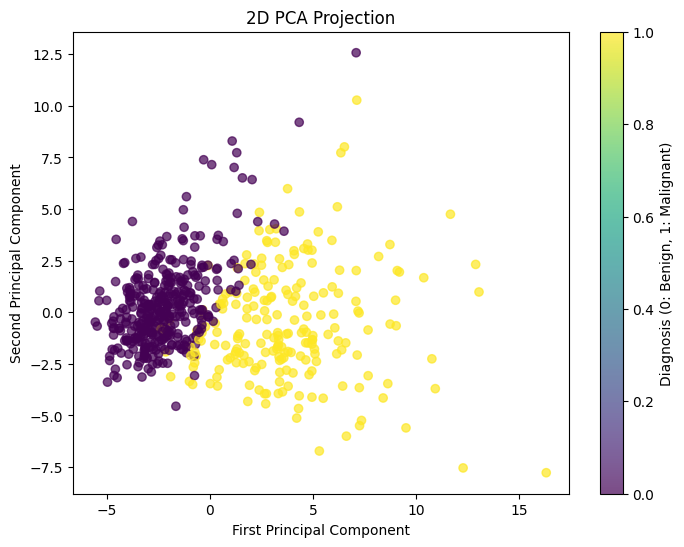

In [14]:
# تجسم در ۲ بعد (اگر n_components >= 2)
if n_components >= 2:
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.7)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('2D PCA Projection')
    plt.colorbar(scatter, label='Diagnosis (0: Benign, 1: Malignant)')
    plt.show()

In [15]:
# ذخیره داده‌های کاهش بعد یافته
import numpy as np

np.save('X_pca.npy', X_pca)
np.save('y.npy', y)

# ذخیره مدل PCA برای استفاده بعدی
import joblib
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nفایل‌های خروجی با موفقیت ذخیره شدند:")
!ls


فایل‌های خروجی با موفقیت ذخیره شدند:
'data (1).csv'	 pca_model.pkl	 scaler.pkl   y.npy
 data.csv	 sample_data	 X_pca.npy


In [16]:
# تحلیل مؤلفه‌های اصلی
print("\nمهم‌ترین ویژگی‌های هر مؤلفه اصلی:")
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(n_components)])
print(components_df)

# نمایش مهم‌ترین ویژگی‌ها برای PC1
print("\nمهم‌ترین ویژگی‌ها برای اولین مؤلفه اصلی:")
print(components_df.loc['PC1'].abs().sort_values(ascending=False).head(5))


مهم‌ترین ویژگی‌های هر مؤلفه اصلی:
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
PC2     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PC4     -0.041409      0.603050       -0.041983  -0.053434        -0.159383   
PC5     -0.037786      0.049469       -0.037375  -0.010331         0.365089   
PC6      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
PC7     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
PC8     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
PC9     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
PC10     0.095486      0.240934        0.086386   0.074956        -0.069293   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PC1           0.2